# Exercise 3:  Supervised Learning - Linear Regression and SVM

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

col_list = ['#cc615c', '#6965a7', '#f1bdbf']
sns.set_palette(col_list)

import warnings
warnings.filterwarnings('ignore') #hide warning

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

# mpath='' # local files
mpath = "/content/gdrive/My Drive/Colab Notebooks/Data Science Class/Exercise/"
spath = "/content/gdrive/My Drive/Colab Notebooks/" # path to save your image files

Mounted at /content/gdrive


## Exercise 1: Linear Regression and Model Evaluation
Source: https://www.kaggle.com/suzanaiacob/predicting-credit-card-balance-using-regression

In [4]:
#credit_df = pd.read_csv('./data/Credit.csv')
credit_df = pd.read_csv(mpath+'data/Credit.csv')
credit_df = credit_df.rename(columns={"Unnamed: 0":"ID"})
credit_df.head()

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


### a. Use a linear regression model to predict credit card balance from client's rating.

In [5]:
model_1 = smf.ols(formula='Balance ~ Rating', data=credit_df).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1168.
Date:                Fri, 16 Apr 2021   Prob (F-statistic):          1.90e-120
Time:                        05:22:57   Log-Likelihood:                -2745.4
No. Observations:                 400   AIC:                             5495.
Df Residuals:                     398   BIC:                             5503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -390.8463     29.069    -13.446      0.000    -447.993    -333.699
Rating         2.5662      0.075     34.176      0.000       2.419       2.714
==============================================================================
Omnibus:                       23.223   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.802
Skew:                           0.390   Prob(JB):                     3.75e-09
Kurtosis:                       4.311   Cond. No.                         970.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Moderate-to-high R<sup>2</sup> at 0.745 and rating is shown to be significant. Furthermore, 1 point increase in rating leads to roughly an increase of 2.5 points in balance.

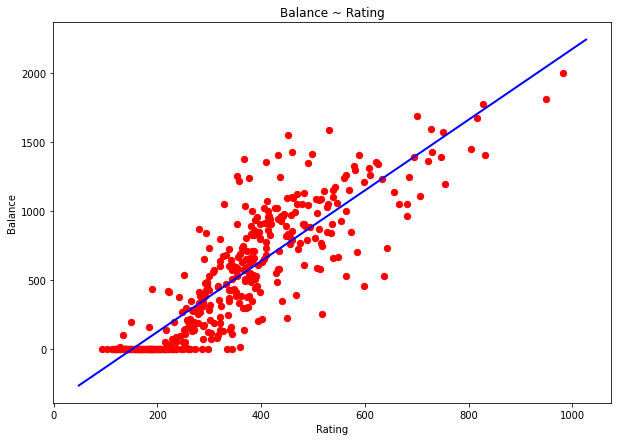

In [6]:
# plot result
params = model_1._results.params
intercept_1, slope_1 = params

fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(x=credit_df['Rating'], y=credit_df['Balance'], marker='o', color='red', s=40)
x_1 = np.array(ax.get_xlim())
y_1 = intercept_1 + slope_1 * x_1
ax.plot(x_1, y_1, color='blue', linewidth=2)
ax.set_xlabel('Rating')
ax.set_ylabel('Balance')
ax.set_title('Balance ~ Rating');

The plot suggests that the positive relationship between balance and rating does exist. However, this relationship may vary between different ranges of rating, .e.g. a very low balance for customers with rating below than 200.

### b. Use a multiple linear regression to predict credit card balance from client's rating and income.

In [7]:
model_2 = smf.ols(formula='Balance ~ Rating + Income', data=credit_df).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1391.
Date:                Fri, 16 Apr 2021   Prob (F-statistic):          4.52e-180
Time:                        05:23:02   Log-Likelihood:                -2603.3
No. Observations:                 400   AIC:                             5213.
Df Residuals:                     397   BIC:                             5225.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -534.8122     21.603    -24.757      0.000    -577.282    -492.342
Rating         3.9493      0.086     45.810      0.000       3.780       4.119
Income        -7.6721      0.378    -20.272      0.000      -8.416      -6.928
==============================================================================
Omnibus:                       91.478   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.964
Skew:                           1.320   Prob(JB):                     1.84e-35
Kurtosis:                       4.621   Cond. No.                     1.04e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### c. Model evaluation
a. Accuracy of coefficient estimates:<br>
- Coefficients for the income and rating are significant for the p-value of 0.001.

b. Model fit:
- R<sup>2</sup>: Including income along with rating improves the R<sup>2</sup> from 0.746 to 0.875  
- AIC and BIC: The larger model shows better information criteria values

Given the two options, we would go for model_2 as it improves the R<sup>2</sup> by more 0.1 with only adding 1 more predictor.

## Exercise 2: Linear Regression - Qualitative Predictors and Interaction Terms

### a. Use a linear regression to predict credit card balance from student status.

In [8]:
le = LabelEncoder()
credit_df['student_Yes'] = le.fit_transform(credit_df['Student'])

model_3 = smf.ols(formula='Balance ~ student_Yes', data=credit_df).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Fri, 16 Apr 2021   Prob (F-statistic):           1.49e-07
Time:                        05:23:04   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     480.3694     23.434     20.499      0.000     434.300     526.439
student_Yes   396.4556     74.104      5.350      0.000     250.771     542.140
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         3.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Student status is shown to be a significant predictor in predicting credit card balance. However, with a very low R<sup>2</sup> value at 0.065, this might not be a useful prediction model.

### b. Create a multiple linear regression to predict credit card balance from client's student status and rating, and plot the result

In [9]:
model_4 = smf.ols(formula='Balance ~ student_Yes*Rating', data=credit_df).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     579.3
Date:                Fri, 16 Apr 2021   Prob (F-statistic):          2.13e-144
Time:                        05:23:05   Log-Likelihood:                -2682.5
No. Observations:                 400   AIC:                             5373.
Df Residuals:                     396   BIC:                             5389.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -423.3712     26.146    -16.193      0.000    -474.773    -371.969
student_Yes          311.9994     85.868      3.633      0.000     143.186     480.813
Rating                 2.5454      0.067     37.728      0.000       2.413       2.678
student_Yes:Rating     0.2461      0.224      1.100      0.272      -0.194       0.686
==============================================================================
Omnibus:                       13.303   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.026
Skew:                          -0.400   Prob(JB):                     0.000900
Kurtosis:                       3.451   Cond. No.                     3.38e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

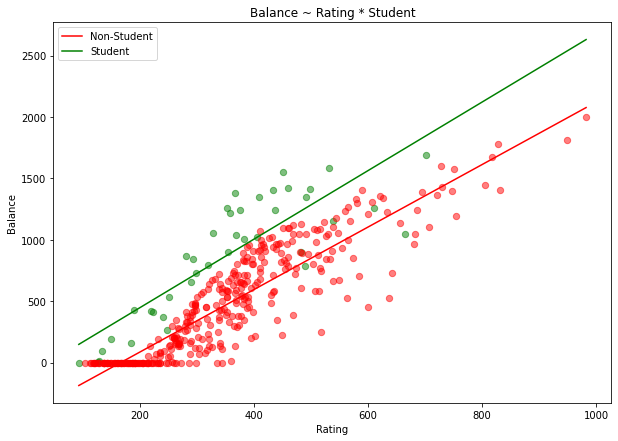

In [10]:
intercept_no, intercept_yes, slope_no, slope_yes = model_4._results.params

fig, ax = plt.subplots(figsize=(10,7))
rating = np.array((credit_df['Rating'].min(), credit_df['Rating'].max()))
y_no = intercept_no + slope_no * rating
y_yes = intercept_no + slope_no * rating + intercept_yes + slope_yes * rating 

ax.scatter(x=credit_df[credit_df['student_Yes'] == 1]['Rating'], y=credit_df[credit_df['student_Yes'] == 1]['Balance'], marker='o', color='green', alpha=0.5, s=40)
ax.scatter(x=credit_df[credit_df['student_Yes'] == 0]['Rating'], y=credit_df[credit_df['student_Yes'] == 0]['Balance'], marker='o', color='red', alpha=0.5, s=40)

ax.plot(rating, y_no, color='red', label='Non-Student')
ax.plot(rating, y_yes, color='green', label='Student')

ax.set_xlabel('Rating')
ax.set_ylabel('Balance')
ax.set_title('Balance ~ Rating * Student')
ax.legend();

The model's R<sup>2</sup> is moderate-to-high at 0.813. Furthermore, both student status and rating are shown to be a significant predictor in predicting credit card balance. But the interaction terms between student status and rating is not significant. This could indicate that a simpler model without the interaction term might be preferable.

The plot seems to support the idea of having two different line fit depending on the client's student status, e.g. the green points (students) are roughly separable from the red ones (non-students) in the balance-rating scatterplot.

## Exercise 3: Residual Analysis and Model Fitness

### a. Choose one predictor variable and create the residual plots

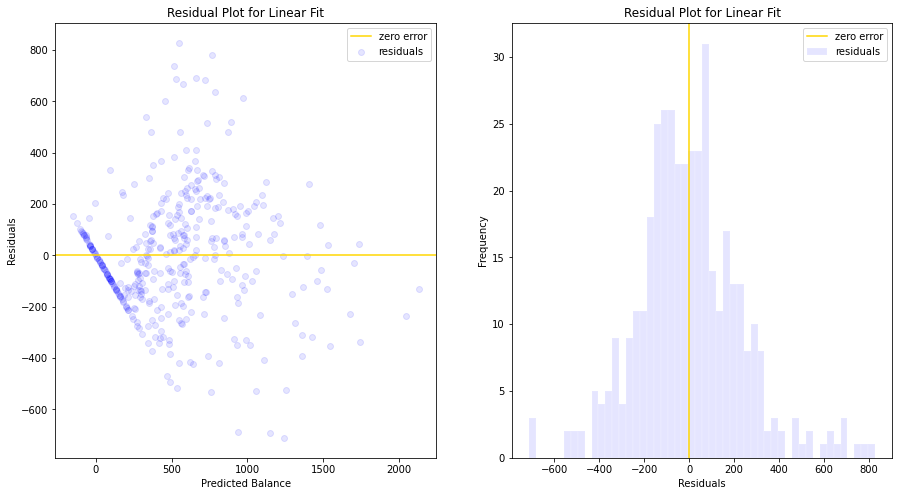

In [11]:
from sklearn import linear_model
from statsmodels.stats.outliers_influence import summary_table

model_res = linear_model.LinearRegression()
model_res = model_res.fit(credit_df[['Rating']], credit_df['Balance'])

fig, ax = plt.subplots(1, 2, figsize=(15, 8))

fitted_vals = model_res.predict(credit_df[['Rating']])
residuals = credit_df['Balance'] - fitted_vals

ax[0].scatter(fitted_vals, residuals, color='blue', alpha=0.1, label='residuals')
ax[0].axhline(y=0, color='gold', label='zero error')
ax[0].set_xlabel('Predicted Balance')
ax[0].set_ylabel('Residuals')
ax[0].set_title('Residual Plot for Linear Fit')

ax[0].legend(loc='best')

ax[1].hist(residuals, color='blue', alpha=0.1, label='residuals', bins=50, edgecolor='white', linewidth=2)
ax[1].axvline(x=0, color='gold', label='zero error')
ax[1].set_xlabel('Residuals')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Residual Plot for Linear Fit')
ax[1].legend(loc='best');

From the histogram, the residuals seem to be normally distributed and centered at zero. The scatterplot suggests that the residuals are distributed rather randomly in respect to the predicted values.

The scatterplot reveals a flaw of the model, i.e., the linearity on the left hand corner of the plot. This happens due to a number of clients with rating 0-300 having 0 balance. For a line to predict this properly it has to be a constant (in this case at 0), i.e. have a zero slope. Since our model predicts this region with a non-zero slope, the residuals will be simply the negative value of the predicitons, e.g. if the line predicts balance at 200 and the actual value is 0, then the residual is -200.
### b. Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

# data transformation as we need the dependent variable to be discrete
# if value is above the balance_threshold of 1200, then it's class 1, otherwise it's rounded
balance_threshold = 1200
credit_df['Balance_bin'] = credit_df['Balance'].apply(lambda x: 1 if x > balance_threshold else np.round(x/balance_threshold))

# fit the model
logreg = LogisticRegression().fit(credit_df[['Rating']], credit_df['Balance_bin'])

# this returns the probability of an instance for each class
# e.g. for 2 instances: [[0.9, 0.1], [0.4, 0.6]]
# instance 1 have 0.9 probability to be class 0, and 0.1 probability to be class 1
prob = logreg.predict_proba(credit_df[['Rating']])

# predict the balance as the median multiplied by the probabilty of being in class 1 (balance above median)
pred_log = prob[:, 1] * balance_threshold

In [13]:
tss = np.sum((credit_df['Balance'] - credit_df['Balance'].mean())**2) # total sum of squares
rss = np.sum((credit_df['Balance'] - pred_log)**2) # residual sum of squares
r2 = 1 - (rss/tss) # R-squared (explained variance)
print('Explained Variance:')
print('Linear Regression: {:5.3f}'.format(model_1.rsquared))
print('Logistic Regression: {:5.3f}'.format(r2))

Explained Variance:
Linear Regression: 0.746
Logistic Regression: 0.710


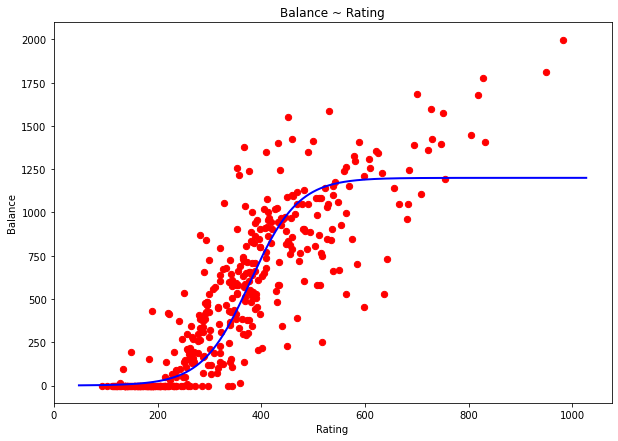

In [14]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(x=credit_df['Rating'], y=credit_df['Balance'], marker='o', color='red', s=40)
x_1 = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], balance_threshold)
y_1 = logreg.predict_proba(x_1.reshape(-1, 1))[:, 1] * balance_threshold
ax.plot(x_1, y_1, color='blue', linewidth=2)
ax.set_xlabel('Rating')
ax.set_ylabel('Balance')
ax.set_title('Balance ~ Rating');

The explained variance of the logistic regression is almost the same as form linear regression. The reason for logistic regression was the 's-curve' shown in the balance-rating scatterplot. However, large values are clearly underfitted and also many of the ratings with 0 balance are not matched well. Another option might be to do a piecewise linear regression, i.e. fit a separate model for ratings up to 200 and for ratings above 200.

### c. Examine the effect of number of predictors to the BIC metric.

In [15]:
# reload the credit card data
#df = pd.read_csv('./data/Credit.csv')
df = pd.read_csv(mpath+'data/Credit.csv')

# transform the categorical variables into data type 'category'
df.Gender = df.Gender.astype('category')
df.Student = df.Student.astype('category')
df.Married = df.Married.astype('category')
df.Ethnicity = df.Ethnicity.astype('category')

In [16]:
cols = df.drop(['Unnamed: 0', 'Balance'], axis=1).columns
bic = []
formula = 'Balance~Income'
for i in range(1, len(cols)):
    formula += str('+' + cols[i])
    model = smf.ols(formula, df).fit()
    bic.append(model._results.bic)

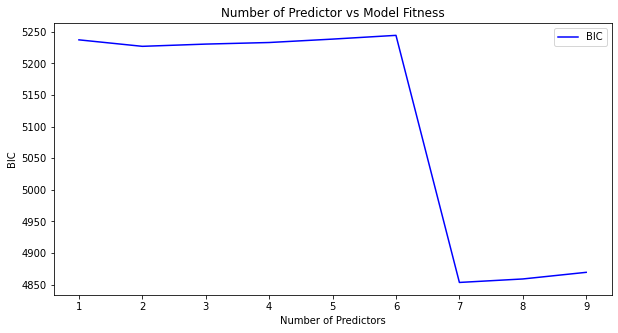

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(range(1, len(cols)), bic, color='blue', label='BIC')

ax.set_title('Number of Predictor vs Model Fitness')
ax.set_xlabel('Number of Predictors')
ax.set_ylabel('BIC')
ax.legend(loc='best')

plt.show()

The model with 7 predictors, taken from the first 7 columns seem to be the best model in terms of BIC. However, it is unclear whether any 7-variable model would be the best option or which variables are the more important ones to predict the credit card balance.

## Exercise 4: The Role of Support Vectors

In [18]:
import sys
import scipy as sp
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

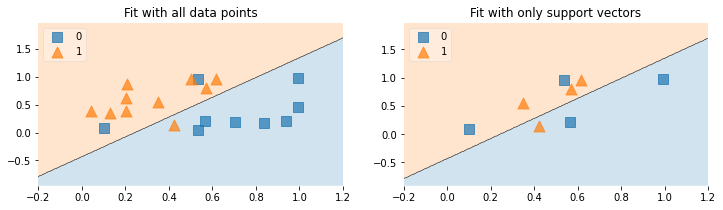

In [19]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec

#data_2 = pd.read_csv('./data/svm_data2_train.txt', delimiter=',') # a toy dataset
data_2 = pd.read_csv(mpath+'data/svm_data2_train.txt', delimiter=',') # a toy dataset

fig, ax = plt.subplots(1, 2, figsize = (12, 3))

# Specify keyword arguments to be passed to underlying plotting functions for customization
scatter_kwargs = {'s': 120, 'edgecolor': None, 'alpha': 0.7} # arguments for the scatterplot points
contourf_kwargs = {'alpha': 0.2} # arguments for the countour

x = data_2.values[:, :-1]
y = data_2.values[:, -1].astype(np.integer)

# Fit SVM model with all the data points
model = svm.SVC(C=1000, kernel='linear')
model.fit(x, y)
plot_decision_regions(X=x, y=y, clf=model, legend=2, ax=ax[0],
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs)
ax[0].set_xlim(-0.2, 1.2)
ax[0].set_title('Fit with all data points')

# Fit SVM model with only support vectors
sv_indices = model.support_ # retrieve the support vector indices
model_new = svm.SVC(C=1000, kernel='linear')
model_new.fit(x[sv_indices], y[sv_indices])
plot_decision_regions(X=x[sv_indices], y=y[sv_indices], clf=model_new, legend=2, ax=ax[1],
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs)
ax[1].set_xlim(-0.2, 1.2)
ax[1].set_title('Fit with only support vectors');

Both SVM models are identical, as decision boundaries are inferred from the support vectors. Hence, only using the support vectors would give the same result with adding other data points which are not support vectors.

## Exercise 5: Margin vs Misclassification Trade-off

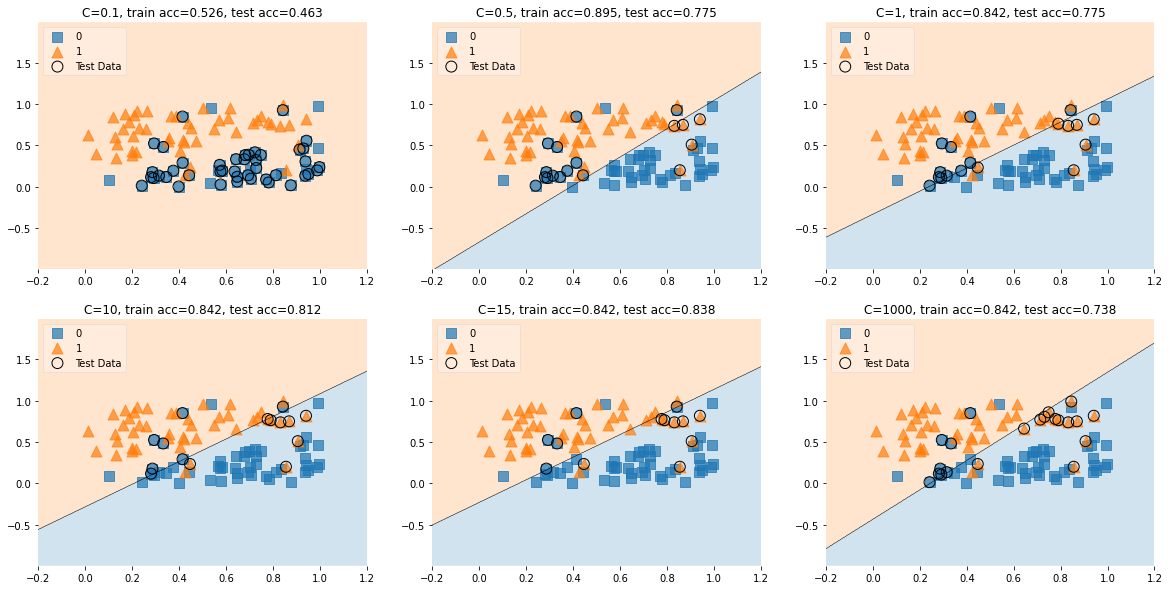

In [20]:
# Load train data
data_train_2 = data_2.values
x_train_2 = data_train_2[:, 0:-1]
y_train_2 = data_train_2[:, -1].astype(np.integer)

# Load test data
#data_test_2 = np.loadtxt("./data/svm_data2_test.txt", delimiter=',')
data_test_2 = np.loadtxt(mpath+"data/svm_data2_test.txt", delimiter=',')
x_test_2 = data_test_2[:, 0:-1]
y_test_2 = data_test_2[:, -1].astype(np.integer)

# total data
x_2 = np.concatenate((x_train_2, x_test_2))
y_2 = np.concatenate((y_train_2, y_test_2))

# Fit and plot for different 'C' values
# C values to inspect
C = [0.1, 0.5, 1, 10, 15, 1000]

scatter_highlight_kwargs = {'s': 120, 'label': 'Test Data'} # arguments for the highlighted points

fig, axes = plt.subplots(2, 3, figsize = (20, 10))
for i, ax in enumerate(axes.flatten()):
    model = svm.SVC(C=C[i], kernel='linear')
    model.fit(x_train_2, y_train_2)
    pred = model.predict(x_test_2) # get predicted classes
    mis_indices = np.where(pred != y_test_2)[0] # get misclassified instances

    plot_decision_regions(X=x_2, y=y_2, clf=model, legend=2, ax=ax,
                          X_highlight=x_test_2[mis_indices], # define which data points to be highlighted
                          scatter_kwargs=scatter_kwargs,
                          contourf_kwargs=contourf_kwargs,
                          scatter_highlight_kwargs=scatter_highlight_kwargs)

    tr_acc = model.score(x_train_2, y_train_2)
    ts_acc = model.score(x_test_2, y_test_2)
    
    # aesthetics
    ax.set_xlim(-0.2, 1.2)
    ax.set_title('C={}, train acc={:4.3f}, test acc={:4.3f}'.format(C[i], tr_acc, ts_acc))

For `dataset_2`, any linear decision boundary would have some errors. In this case, SVM chooses a decision boundary by trading-off the errors for margin (i.e. balancing minimizing error with maximizing margin). The parameter $C$ controls the trade-off. 